In [ ]:
# Setting path
import sys
import os
# getting the name of the directory where the this file is present.
current = os.path.abspath('')
# Getting the parent directory 
parent = os.path.dirname(current)
# adding the parent directory to
# the sys.path.
sys.path.append(os.path.dirname(parent))

In [ ]:
#Importing important libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pickle
import holidays
import config

In [2]:
pd.set_option('display.max_columns', 150)

In [3]:
data = pd.read_pickle('mosaic_order_data.pickle')
data.head(3)

,Restaurant,Vendor Company,Delivering Outlet,Foodcourt,City,Order Id,Token No,Order Placed Date,Order Placed Time,Status,Prepaid Slot Session,Prepaid Slot Time,Prepaid Slot Date,CreatedBy,Order Accepted Time,Cancelled Reason,Cancelled Time,Cancelled By,Cust Name,Cust Mobile,Cust Email,Order Type,Parcel Charge,Delivery Charge,CSGT,SGST,Restaurant Discount,Merchant Price (Excluding GST),Merchant Price,Foodcourt Discount,GoKhana Discount,Company Payable,Value,Paid Amount,GoKash,Payment Status,Order Paid Time,Payment Gateway,Prepaid,No of Items,Channel,Delivery Address,Delivery Pincode,Item included 1 Tax Name,Item included 1 Tax Amt,Item included 2 Tax Name,Item included 2 Tax Amt,Item 1 Name,Item 1 Count,Item 1 Price,Item 1 IsMRP,Item 1 GST Included,Item 1 Tax Amount,Item 1 Total Amount,Item 1 Status,Item 2 Name,Item 2 Count,Item 2 Price,Item 2 IsMRP,Item 2 GST Included,Item 2 Tax Amount,Item 2 Total Amount,Item 2 Status,Item 3 Name,Item 3 Count,Item 3 Price,Item 3 IsMRP,Item 3 GST Included,Item 3 Tax Amount,Item 3 Total Amount,Item 3 Status,Item 4 Name,Item 4 Count,Item 4 Price,Item 4 IsMRP,Item 4 GST Included,Item 4 Tax Amount,Item 4 Total Amount,Item 4 Status,Payment 1 Gateway,Payment 1 Type,Payment 1 Amount,Payment 1 Time,Payment 1 External Transactionid,Payment 1 RRNO,Payment 1 UPI RRN,Payment 1 Settled from PG,Item 5 Name,Item 5 Count,Item 5 Price,Item 5 IsMRP,Item 5 GST Included,Item 5 Tax Amount,Item 5 Total Amount,Item 5 Status,Item 6 Name,Item 6 Count,Item 6 Price,Item 6 IsMRP,Item 6 GST Included,Item 6 Tax Amount,Item 6 Total Amount,Item 6 Status,Payment 2 Gateway,Payment 2 Type,Payment 2 Amount,Payment 2 Time,Payment 2 External Transactionid,Payment 2 RRNO,Payment 2 UPI RRN,Payment 2 Settled from PG,Item 7 Name,Item 7 Count,Item 7 Price,Item 7 IsMRP,Item 7 GST Included,Item 7 Tax Amount,Item 7 Total Amount,Item 7 Status
0,Juicery,Kalyani Aura,NaN,Kalyani-Aura-BLR,Bangalore,ORD14012043,O150,02 Nov 22,09:10:23 PM,completed,NaN,NaN,NaN,63021086fd714b1072084553,"Nov 02, 2022 09:12 PM",NaN,NaN,NaN,Anagha,8.281516e+09,anagha.jayakumar@byjus.com,dine-in,0.0,0.0,0.29,0.29,0,11.42,12.0,0,0,0,12,12.0,0.0,complete,"Nov 02, 2022 09:10 PM",PayU,True,1.0,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Ginger tea,1,11.42,NON-MRP,True,0.58,12,completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PayU,UPI,12.0,"Nov 02, 2022 09:10 PM",16165239636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Juicery,Kalyani Aura,NaN,Kalyani-Aura-BLR,Bangalore,ORD14011875,O149,02 Nov 22,08:59:45 PM,completed,NaN,NaN,NaN,62ef62a415d4370f11012d2c,"Nov 02, 2022 09:09 PM",NaN,NaN,NaN,NaN,7.417714e+09,sagar.anil101@gmail.com,dine-in,0.0,0.0,0.58,0.58,0,22.84,24.0,0,0,0,24,24.0,0.0,complete,"Nov 02, 2022 08:59 PM",PayU,True,2.0,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Ginger tea,2,22.84,NON-MRP,True,1.16,24,completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PayU,UPI,24.0,"Nov 02, 2022 08:59 PM",16165182713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chaat-pata,Kalyani Aura,NaN,Kalyani-Aura-BLR,Bangalore,ORD14011671,O055,02 Nov 22,08:43:44 PM,completed,NaN,NaN,NaN,62ef7daae28f5235b368b565,"Nov 02, 2022 08:44 PM",NaN,NaN,NaN,NaN,6.394917e+09,kaurjasvinder429@gmail.com,dine-in,0.0,0.0,1.43,1.43,0,57.14,60.0,0,0,0,60,60.0,0.0,complete,"Nov 02, 2022 08:43 PM",PayU,True,2.0,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Dahi Kachori Chaat,1,38.10,NON-MRP,True,1.90,40,completed,Kachori,1.0,19.04,NON-MRP,1.0,0.96,20.0,completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PayU,UPI,60.0,"Nov 02, 2022 08:43 PM",16165096568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# overwriting data after changing format
data['Order Placed Date_Time']= pd.to_datetime(data["Order Placed Date"].astype(str)+' '+data['Order Placed Time'].astype(str))

In [7]:
df = data[['Order Placed Date_Time','CreatedBy']]

In [8]:
df.head()

,Order Placed Date_Time,CreatedBy
0,2022-11-02 21:10:23,63021086fd714b1072084553
1,2022-11-02 20:59:45,62ef62a415d4370f11012d2c
2,2022-11-02 20:43:44,62ef7daae28f5235b368b565
3,2022-11-02 20:28:04,62ef94161aec6d46b7eb5886
4,2022-11-02 20:25:56,63442e916a5bf369630f3072


In [9]:
df = df.resample('H', on = 'Order Placed Date_Time').nunique()

In [10]:
df.head()

,CreatedBy
Order Placed Date_Time,
2022-08-05 09:00:00,12
2022-08-05 10:00:00,11
2022-08-05 11:00:00,18
2022-08-05 12:00:00,15
2022-08-05 13:00:00,40


In [18]:
df

,CreatedBy
Order Placed Date_Time,
2022-08-05 09:00:00,12
2022-08-05 10:00:00,11
2022-08-05 11:00:00,18
2022-08-05 12:00:00,15
2022-08-05 13:00:00,40
...,...
2022-11-13 16:00:00,1
2022-11-13 17:00:00,3
2022-11-13 18:00:00,1


In [12]:
df.to_pickle('mosaic_conjestion_data.pickle')


In [13]:
df = pd.read_pickle('mosaic_conjestion_data.pickle')
df.head()

,CreatedBy
Order Placed Date_Time,
2022-08-05 09:00:00,12
2022-08-05 10:00:00,11
2022-08-05 11:00:00,18
2022-08-05 12:00:00,15
2022-08-05 13:00:00,40


<AxesSubplot: xlabel='Order Placed Date_Time'>

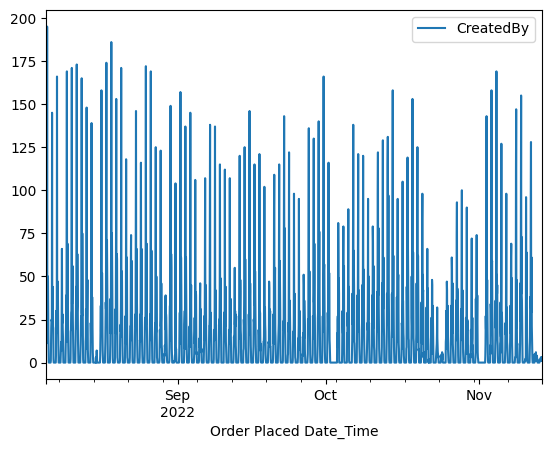

In [23]:
df.plot()